# Example: Sentiment Analysis with Google Cloud Natural Language API

Before anything, you need to install the Google Cloud Client Library for Python. You can run through this quick tutorial from the official Google Cloud repo to install the client and necessary dependencies.

https://github.com/GoogleCloudPlatform/python-docs-samples/tree/master/language/sentiment

In [1]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In order to make any calls to the Google Cloud API, you will need to authenticate. You can get a downloadable .JSON key from logging in to your service account. Download and place the key's filepath in the code below. Further instructions for authentication in the Google Cloud docs:

https://cloud.google.com/docs/authentication/getting-started

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = #PATHFILE_TO_AUTH_KEY

In [3]:
def analyze(movie_review_filename):
    client = language.LanguageServiceClient()

    with open(movie_review_filename, 'r') as review_file:
        content = review_file.read()

    document = types.Document(
        content=content,
        type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)

    return annotations

This function can be used on any .txt file to return a .JSON-structured sentiment analysis. Let's try with the sample text included in below:

"`Bladerunner` is often touted as one of the best science fiction films ever
made. Indeed, it satisfies many of the requisites for good sci-fi: a future
world with flying cars and humanoid robots attempting to rebel against their
creators. But more than anything, `Bladerunner` is a fantastic exploration
of the nature of what it means to be human. If we create robots which can
think, will they become human? And if they do, what makes us unique? Indeed,
how can we be sure we're not human in any case? `Bladerunner` explored
these issues before such movies as `The Matrix,' and did so intelligently.
The visual effects and score by Vangelis set the mood. See this movie
in a dark theatre to appreciate it fully. Highly recommended!"


In [4]:
sample_text = analyze("bladerunner.txt")
print(sample_text.document_sentiment)

magnitude: 6.199999809265137
score: 0.6000000238418579



The API also provides sentiment evaluations on a sentence-by-sentence basis.

In [5]:
print(sample_text.sentences[0])

text {
  content: "`Bladerunner` is often touted as one of the best science fiction films ever\nmade."
  begin_offset: -1
}
sentiment {
  magnitude: 0.8999999761581421
  score: 0.8999999761581421
}



Each sentence (as well as the document in whole) contain a sentiment value and a magnitude value. The sentiment can range from '-1' to '1', where the sentence gets more positive the closer it gets to '1' and where the sentence gets more negative the closer it gets to '-1'. A sentiment score closer to '0' indicates either a neutral or mixed sentiment. The magnitude ranges from '0' to '1' and indicates how strong the sentiment is. More information can be found here:

https://cloud.google.com/natural-language/docs/basics#sentiment-analysis-values

By putting the individual sentence scores in an array, we can create a graph that demonstrates how the sentiment of the text varies by sentence.

In [6]:
scores = []
magnitudes = []
for i in sample_text.sentences:
    magnitudes.append(i.sentiment.magnitude)
    scores.append(i.sentiment.score)

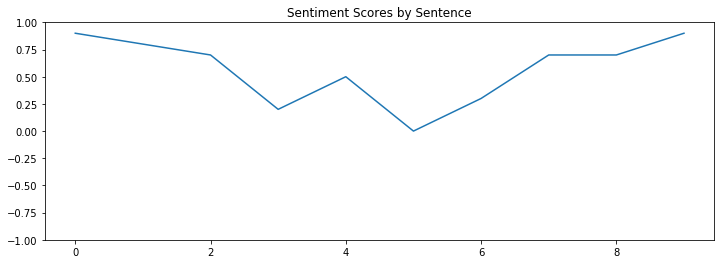

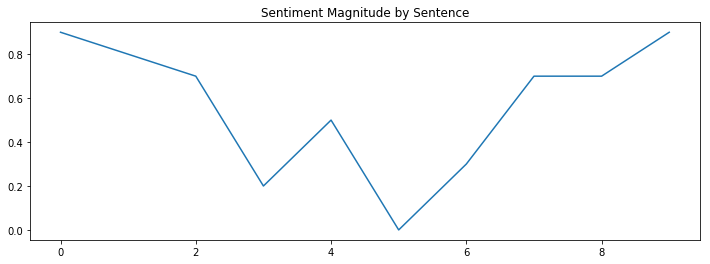

In [7]:
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(scores)
plt.ylim([-1,1])
plt.title('Sentiment Scores by Sentence')

plt.figure(figsize=(12,4))
plt.plot(magnitudes)
plt.title('Sentiment Magnitude by Sentence')

Let's try some more advanced analysis of a longer article.

https://blog.usejournal.com/what-i-learned-from-reading-every-amazon-shareholders-letter-cdc35f309e8b

In [8]:
sample_text2 = analyze("amazon.txt")

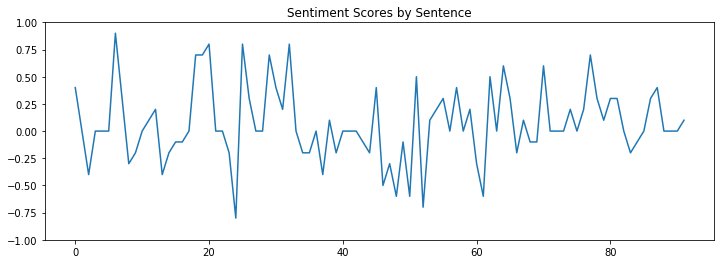

In [9]:
scores = []
magnitudes = []
for i in sample_text2.sentences:
    magnitudes.append(i.sentiment.magnitude)
    scores.append(i.sentiment.score)
    
plt.figure(figsize=(12,4))
plt.plot(scores)
plt.ylim([-1,1])
plt.title('Sentiment Scores by Sentence')

(0, 1)

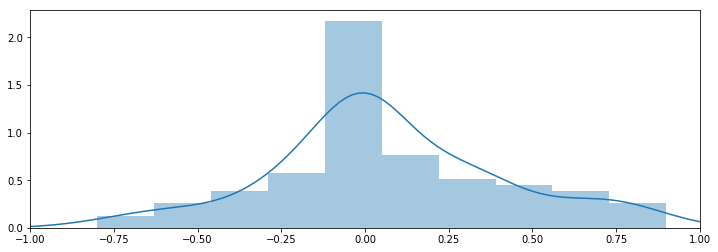

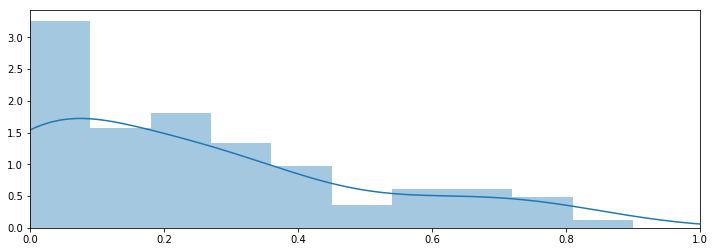

In [10]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.distplot(scores, bins=10);
plt.xlim([-1,1])

plt.figure(figsize=(12,4))
sns.distplot(magnitudes, bins=10);
plt.xlim([0,1])

Using the Pandas library, we can combine the sentence scores and sentence magnitudes together to see what the distribution of scores and magnitues within the article look like together.

In [11]:
import pandas as pd
df = pd.DataFrame(data={'Magnitudes': magnitudes, 'Scores': scores})

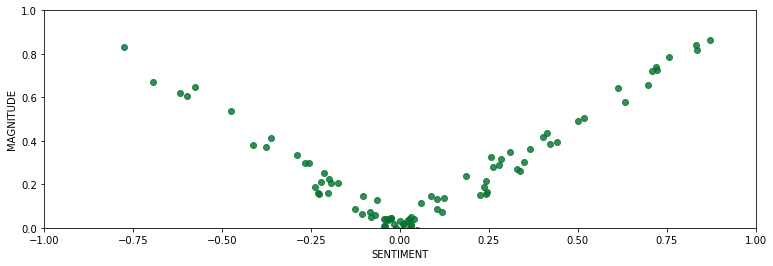

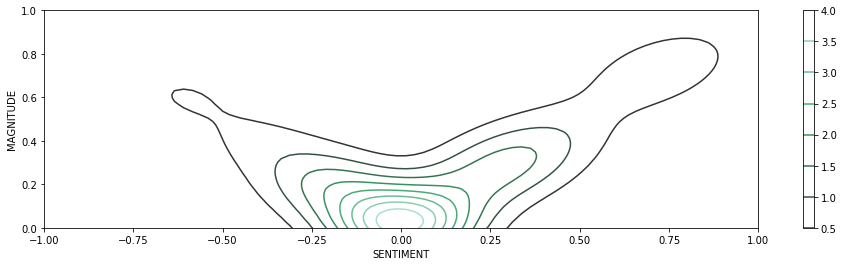

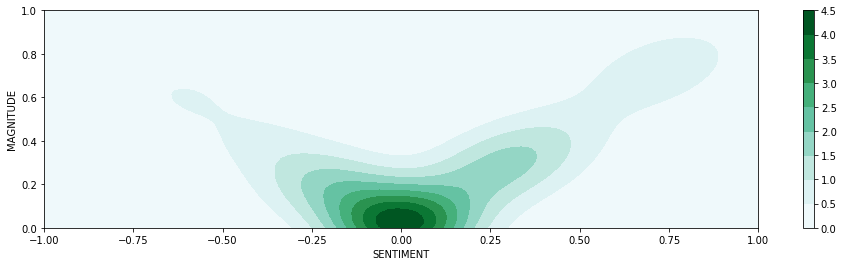

In [12]:
plt.figure(figsize=(12.75,4))
sns.set_palette("BuGn_r")
sns.regplot(x="Scores", y="Magnitudes", data=df, fit_reg = False, x_jitter=.05, y_jitter=.05);
plt.xlim([-1,1])
plt.ylabel('MAGNITUDE')
plt.ylim([0,1])
plt.xlabel('SENTIMENT')

plt.figure(figsize=(16,4))
sns.kdeplot(data=df["Scores"], data2=df["Magnitudes"],  cbar=True)
plt.xlim([-1,1])
plt.ylabel('MAGNITUDE')
plt.ylim([0,1])
plt.xlabel('SENTIMENT')

plt.figure(figsize=(16,4))
sns.kdeplot(data=df["Scores"], data2=df["Magnitudes"], cbar=True, shade=True)
plt.xlim([-1,1])
plt.ylabel('MAGNITUDE')
plt.ylim([0,1])
plt.xlabel('SENTIMENT')